# Validasi Vocabulary Untuk Dataset Jumlah RT/RW Perkelurahan DKI Jakarta 2013
## Kontributor: Titanio Meiga Batry, Nanda Khibran, Nur Aini Rakhmawati
## email kontributor: titaniokuliah@gmail.com, anandakp720@gmail.com, nur.aini@is.its.ac.id
## Departemen Sistem Informasi, Institut Teknologi Sepuluh Nopember
Abstrak:

*Shape Constraint Language (SHACL) adalah spesifikasi World Wide Web Consortium (W3C) untuk memvalidasi data berbasis grafik dalam berbagai kondisi. SHACL mencakup fungsionalitas untuk mengekspresikan kondisi yang membatasi jumlah nilai yang dapat dimiliki atribut, jenis nilai, rentang numerik, pola pencocokan string, dan kombinasi logis dari batasan ini. SHACL juga menyertakan mekanisme ekstensi untuk mengekspresikan kondisi yang lebih kompleks dalam bahasa seperti SPARQL. Pada kesempatan kali ini kami akan membuat model data SHACL berupa data graph dengan mereferensi pada grafik RDF yang telah dibuat sebelumnya.*

## Vocabulary

Vocabulary ini terdiri atas 4 class dan 5 properti. Vocabulary ini dapat diakses pada [3] dan dataset dapat diakses di [2]


In [22]:
import pandas as pd

!python -m pip install --no-input jupyter-rdfify --quiet
%reload_ext jupyter-rdfify

pd.read_csv('https://raw.githubusercontent.com/Titanzr/rdfTitan/main/datatest.csv')
#tampilkan turtle vocabulary

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyshacl 0.17.0.post2 requires rdflib<7,>=6.0.0, but you have rdflib 5.0.0 which is incompatible.


,nama_provinsi,nama_kabupaten/kota,nama_kecamatan,nama_kelurahan,jumlah_rt,jumlah_rw
0,PROVINSI DKI JAKARTA,JAKARTA PUSAT,GAMBIR,CIDENG,114,10
1,PROVINSI DKI JAKARTA,JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,44,6
2,PROVINSI DKI JAKARTA,JAKARTA UTARA,KOJA,TUGU UTARA,214,19


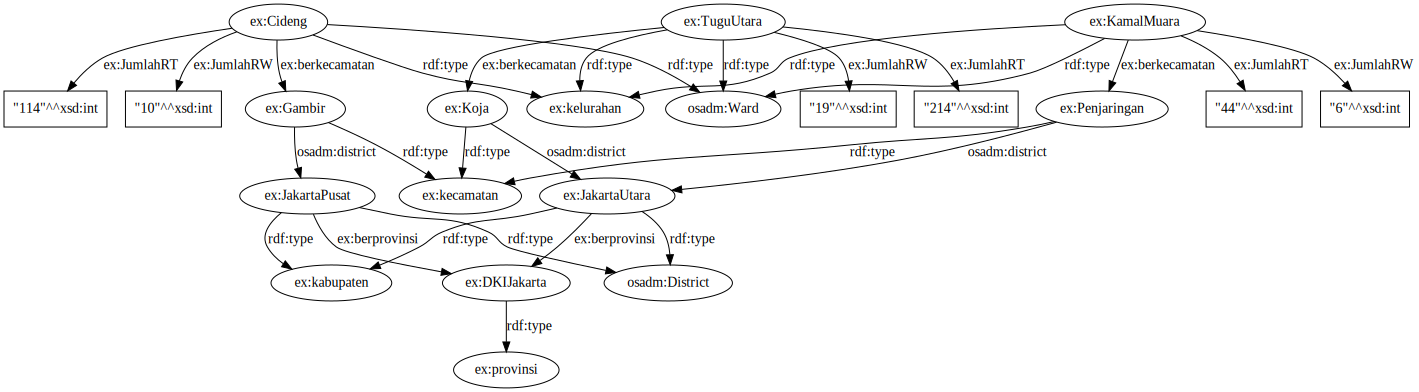

In [23]:
%%rdf turtle

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix osadm: <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .
@prefix ex: <http://example.com/> .

       

#Kelurahan 

ex:Cideng
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Gambir ;
  ex:JumlahRT "114"^^xsd:int ;
  ex:JumlahRW "10"^^xsd:int .

ex:KamalMuara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Penjaringan ;
  ex:JumlahRT "44"^^xsd:int ;
  ex:JumlahRW "6"^^xsd:int .

ex:TuguUtara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Koja ;
  ex:JumlahRT "214"^^xsd:int ;
  ex:JumlahRW "19"^^xsd:int .

#Kecamatan

ex:Gambir
  a ex:kecamatan ;
  osadm:district ex:JakartaPusat .

ex:Penjaringan
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

ex:Koja
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

#Kabupaten  

ex:JakartaPusat
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

ex:JakartaUtara
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

#Provinsi

ex:DKIJakarta
  a ex:provinsi .

#display the table

In [ ]:
#tampilkan turtle vocabulary
#display the table 

## SHACL

Aturan pada SHACL kelompok kami yaitu sebagai berikut :
* Nilai Jumlah RT dan Jumlah RW harus betipe integer(int)
* Setiap Kelurahan hanya bisa diisi satu Kecamatan, tidak boleh lebih.
* Setiap Kecamatan hanya bisa diisi satu Kabupaten, tidak boleh lebih.
* Setiap Kabupaten hanya bisa diisi satu Provinsi, tidak boleh lebih.
* Pengisian antaran class dan property harus sesuai, misal property "Kecamatan" harus diisi dengan kelas "Kecamatan".




In [101]:
shapes_graph = """

@prefix sh:     <http://www.w3.org/ns/shacl#> .
@prefix xsd:    <http://www.w3.org/2001/XMLSchema#> .
@prefix osadm: <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .
@prefix ex: <http://example.com/> .

ex:KecamatanShape a sh:NodeShape ;
    sh:targetClass osadm:Ward ;
    sh:property ex:berkecamatanShape ;
    sh:property ex:JumlahRTShape ;
    sh:property ex:JumlahRWShape .
  
ex:KecamatanShape a sh:NodeShape ;
    sh:targetClass ex:kecamatan ;
    sh:property ex:berkabupatenShape .

ex:KabupatenShape a sh:NodeShape ;
    sh:targetClass osadm:District ;
    sh:property ex:berprovinsiShape .

ex:ProvinsiShape a sh:NodeShape ;
    sh:targetClass osadm:District .



ex:berkecamatanShape a sh:PropertyShape ;
    sh:path ex:berkecamatan ;
    sh:maxCount 1 ;
    sh:class ex:kecamatan .

ex:JumlahRTShape a sh:PropertyShape ;
    sh:path ex:JumlahRT ;
    sh:maxCount 1 ;
    sh:datatype xsd:int .

ex:JumlahRWShape a sh:PropertyShape ;   
    sh:path ex:JumlahRW ;
    sh:maxCount 1 ;
    sh:datatype xsd:int .

ex:berkabupatenShape a sh:PropertyShape ;
    sh:path osadm:district ;
    sh:maxCount 1 ;
    sh:class osadm:District .

ex:berprovinsiShape a sh:PropertyShape;
    sh:path ex:berprovinsi ;
    sh:maxCount 1 ;
    sh:class ex:provinsi .

"""

## Data Graph



In [102]:
data_graph_1 = """


@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix osadm: <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .
@prefix ex: <http://example.com/> .

#Kelurahan 

ex:Cideng
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Gambir ;
  ex:JumlahRT "114"^^xsd:int ;
  ex:JumlahRW "10"^^xsd:int .

ex:KamalMuara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Penjaringan ;
  ex:JumlahRT "44"^^xsd:int ;
  ex:JumlahRW "6"^^xsd:int .

ex:TuguUtara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Koja ;
  ex:JumlahRT "214"^^xsd:int ;
  ex:JumlahRW "19"^^xsd:int .


#Kecamatan

ex:Gambir
  a ex:kecamatan ;
  osadm:district ex:JakartaPusat .

ex:Penjaringan
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

ex:Koja
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .


#Kabupaten  

ex:JakartaPusat
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

ex:JakartaUtara
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

#Provinsi

ex:DKIJakarta
  a ex:provinsi .

#display the table
"""

In [68]:
data_graph_2 = """


@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix osadm: <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .
@prefix ex: <http://example.com/> .

#Kelurahan 

ex:Cideng
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Gambir ;
  ex:JumlahRT "114"^^xsd:int ;
  ex:JumlahRW "10"^^xsd:int .

ex:KamalMuara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Penjaringan ;
  ex:JumlahRT "44"^^xsd:int ;
  ex:JumlahRW "6"^^xsd:int .

ex:TuguUtara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Koja ;
  ex:JumlahRT "214.8"^^xsd:float ;
  ex:JumlahRW "19"^^xsd:int .


#Kecamatan

ex:Gambir
  a ex:kecamatan ;
  osadm:district ex:JakartaPusat .

ex:Penjaringan
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

ex:Koja
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .


#Kabupaten  

ex:JakartaPusat
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

ex:JakartaUtara
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

#Provinsi

ex:DKIJakarta
  a ex:provinsi .

#display the table
"""

In [81]:
data_graph_3 = """


@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix osadm: <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .
@prefix ex: <http://example.com/> .

#Kelurahan 

ex:Cideng
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Gambir ;
  ex:JumlahRT "114"^^xsd:int ;
  ex:JumlahRW "10"^^xsd:int .

ex:KamalMuara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Penjaringan ;
  ex:JumlahRT "44"^^xsd:int ;
  ex:JumlahRW "6"^^xsd:int .

ex:TuguUtara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Koja ;
  ex:JumlahRT "214"^^xsd:int ;
  ex:JumlahRW "19"^^xsd:int .


#Kecamatan

ex:Gambir
  a ex:kecamatan ;
  osadm:district ex:JakartaPusat .

ex:Penjaringan
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

ex:Koja
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .


#Kabupaten  

ex:JakartaPusat
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:JakartaUtara .

ex:JakartaUtara
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

#Provinsi

ex:DKIJakarta
  a ex:provinsi .

#display the table
"""

In [88]:
data_graph_4 = """


@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix osadm: <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .
@prefix ex: <http://example.com/> .

#Kelurahan 

ex:Cideng
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Gambir ;
  ex:JumlahRT "114"^^xsd:int ;
  ex:JumlahRW "10"^^xsd:int .

ex:KamalMuara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Penjaringan, ex:Koja ;
  ex:JumlahRT "44"^^xsd:int ;
  ex:JumlahRW "6"^^xsd:int .

ex:TuguUtara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Koja ;
  ex:JumlahRT "214"^^xsd:int ;
  ex:JumlahRW "19"^^xsd:int .


#Kecamatan

ex:Gambir
  a ex:kecamatan ;
  osadm:district ex:JakartaPusat, ex:JakartaUtara .

ex:Penjaringan
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

ex:Koja
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .


#Kabupaten  

ex:JakartaPusat
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

ex:JakartaUtara
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

#Provinsi

ex:DKIJakarta
  a ex:provinsi .

#display the table
"""

# Validasi SHACL

In [32]:
!python -m pip install --no-input pyshacl --quiet

## Validasi 1
berikut hasil percobaan validasi pertama tanpa mengubah instance.

In [103]:
##data_graph_1
import pyshacl

results = pyshacl.validate(
    data_graph_1,
    shacl_graph=shapes_graph,
    data_graph_format="ttl",
    shacl_graph_format="ttl",
    inference="rdfs",
    debug=True,
    serialize_report_graph="ttl",
    )

conforms, report_graph, report_text = results

print("conforms Data 1", conforms)

conforms Data 1 True


## Validasi 2
berikut hasil percobaan validasi kedua dengan mengubah instance yaitu Jumlah RT diisi dengan nilai bertipe float, bukan bertipe integer.

In [80]:
##data_graph_2
import pyshacl

results = pyshacl.validate(
    data_graph_2,
    shacl_graph=shapes_graph,
    data_graph_format="ttl",
    shacl_graph_format="ttl",
    inference="rdfs",
    debug=True,
    serialize_report_graph="ttl",
    )

conforms, report_graph, report_text = results

print("conforms Data 2", conforms)

Constraint Violation in DatatypeConstraintComponent (http://www.w3.org/ns/shacl#DatatypeConstraintComponent):
	Severity: sh:Violation
	Source Shape: ex:JumlahRTShape
	Focus Node: ex:TuguUtara
	Value Node: Literal("214.8", datatype=xsd:float)
	Result Path: ex:JumlahRT
	Message: Value is not Literal with datatype xsd:int



conforms Data 2 False


## Validasi 3
berikut hasil percobaan validasi ketiga dengan mengubah instance yaitu pada class kabupaten "JakartaPusat" pada property provinsi diisi dengan nama class Kabupaten yaitu "JakartaUtara", sehingga terjadi kesalahan penulis.

In [90]:
##data_graph_3
import pyshacl

results = pyshacl.validate(
    data_graph_3,
    shacl_graph=shapes_graph,
    data_graph_format="ttl",
    shacl_graph_format="ttl",
    inference="rdfs",
    debug=True,
    serialize_report_graph="ttl",
    )

conforms, report_graph, report_text = results

print("conforms Data 3", conforms)

Constraint Violation in ClassConstraintComponent (http://www.w3.org/ns/shacl#ClassConstraintComponent):
	Severity: sh:Violation
	Source Shape: ex:berprovinsiShape
	Focus Node: ex:JakartaPusat
	Value Node: ex:JakartaUtara
	Result Path: ex:berprovinsi
	Message: Value does not have class ex:provinsi



conforms Data 3 False


## Validasi 4
berikut hasil percobaan validasi keempat dengan mengubah instance yaitu pada mengisi property kecamatan lebih dari satu pada class kelurahan. 

In [89]:
##data_graph_4
import pyshacl

results = pyshacl.validate(
    data_graph_4,
    shacl_graph=shapes_graph,
    data_graph_format="ttl",
    shacl_graph_format="ttl",
    inference="rdfs",
    debug=True,
    serialize_report_graph="ttl",
    )

conforms, report_graph, report_text = results

print("conforms Data 4", conforms)

Constraint Violation in MaxCountConstraintComponent (http://www.w3.org/ns/shacl#MaxCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: ex:berkecamatanShape
	Focus Node: ex:KamalMuara
	Result Path: ex:berkecamatan
	Message: More than 1 values on ex:KamalMuara->ex:berkecamatan

Constraint Violation in MaxCountConstraintComponent (http://www.w3.org/ns/shacl#MaxCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: ex:berkabupatenShape
	Focus Node: ex:Gambir
	Result Path: osadm:district
	Message: More than 1 values on ex:Gambir->osadm:district



conforms Data 4 False


##Daftar Pustaka:

1.   Rakhmawati, N. A. (2015). Semantic Web dan Linked Data. Yogyakarta, Indonesia: SiBuku.
2. Titanio Meiga Batry. (2021). Titanzr/rdfTitan: TitanioTugasWeb v1.0.1 (v1.0.1). Zenodo. https://doi.org/10.5281/zenodo.5521429
3. Nanda Khibran, Titanio Meiga Batry, and Nur Aini Rakhmawati. "TugasVocab - TekWeb" DOI: 10.13140/RG.2.2.13420.49283
4. Holger Knublauch and Dimitris Kontokostas. Shapes constraint language (SHACL). W3C Working Draft, https://www.w3.org/TR/2017/WD-shacl-20170202
5. alamat DOI zenodo python notebook untuk SHACL
6. https://data.jakarta.go.id/dataset/jumlahrtrwperkelurahandkijakarta






